In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.5)
%matplotlib inline

In [66]:
import kmeans_combined_revised, simulatedData, time
from kmeans_combined_revised import kmeansplusplus, kmeansparallel, kmeans
from simulatedData import generate_data

In [67]:
# test on simulated data
# set number of clusters
k=4
# set variance for simulation
R = 100
# set dimensions
d=15
# set number of points to generate
npoints = 10000
# generate data
sim_data = generate_data(k,R,d, npoints)

### Timings

In [28]:
# set parameters
k = 50
l=k*2
d = 15
r = 1

In [29]:
sim_data.shape

(10000, 15)

#### Timing selecting centers only

In [9]:
%timeit kmeansplusplus(sim_data, k, d)

1 loop, best of 3: 1min 22s per loop


In [ ]:
%timeit kmeansparallel(sim_data, k, l, r)

#### Timing selecting centers and clustering

In [ ]:
%timeit kmeans(sim_data, kmeansplusplus(sim_data, k, d), k, d)

In [ ]:
%timeit kmeans(sim_data, kmeansparallel(sim_data, k, l, r), k, d)

### Clustering

In [68]:
sim_data_k4 = generate_data(k=6, var=100, dim=2, npoints=10000)

In [69]:
k = 6
l=k*2
d = 2
r = 1

In [70]:
sim_plus = kmeans(sim_data_k4, kmeansplusplus(sim_data_k4, k, d), k, d)

In [71]:
x_plus = sim_plus[0][:,0]
y_plus = sim_plus[0][:,1]
labels_plus = sim_plus[1]

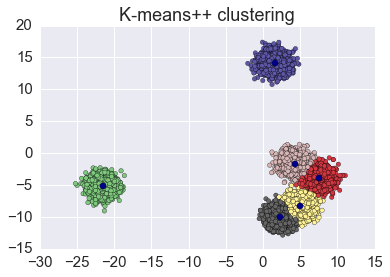

In [72]:
plt.figure()
plt.scatter(sim_data_k4[:,0], sim_data_k4[:,1], c=labels_plus, cmap='Accent')
plt.scatter(x_plus, y_plus, s=40, marker="o", c="darkblue")
plt.title("K-means++ clustering")
pass

In [63]:
sim_para = kmeans(sim_data_k4,kmeansparallel(sim_data_k4, k, l, d, r),k,d)

In [64]:
x_para = sim_para[0][:,0]
y_para = sim_para[0][:,1]
labels_para = sim_para[1]

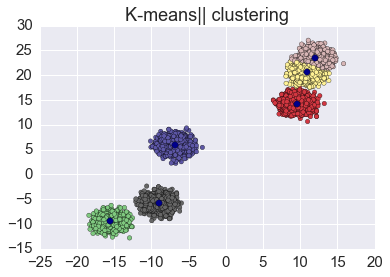

In [65]:
plt.figure()
plt.scatter(sim_data_k4[:,0], sim_data_k4[:,1], c=labels_para, cmap='Accent')
plt.scatter(x_para, y_para, s=40, marker="o", c="darkblue")
plt.title("K-means|| clustering")
pass

### old stuff from real data set

In [1]:
real_data=pd.read_csv('./data/spambase.data', header=None)

In [2]:
real_data.drop(real_data.columns[57], axis=1, inplace=True)

In [4]:
real_data=np.array(real_data)
k=2
d=real_data.shape[1]
res_plus = kmeans(real_data,kmeansplusplus(real_data,k,d),k, d)